In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sys
sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import pandas as pd

In [4]:
df_original = vv.quick_data(separate_Xy=False,
                  numeric_values_only=True, nans_forbidden=True, exceptional_nans=['bedrooms', 'bathrooms'])
#X, y = quick_data(separate_Xy=True,
#                  numeric_values_only=True, nans_forbidden=True, exceptional_nans=['bedrooms', 'bathrooms'])
print(df_original.shape)
df_original.head()

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:331: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 16093/41841/36288/36761 ==> 16093/32312/32109/32118
dataframe length: 16036
allowing Price to pass with 28 nulls/NANs
allowing type to pass with 72 nulls/NANs
dropping size because 13457 nulls/NANs is too many
dropping other_key_info because 16035 nulls/NANs is too many
allowing bullet_points to pass with 1402 nulls/NANs
allowing hold_type to pass with 5193 nulls/NANs
allowing virtualTours to pass with 8 nulls/NANs
allowing rooms to pass with 8 nulls/NANs
allowing nearestAirports to pass with 8 nulls/NANs
allowing nearestStations to pass with 8 nulls/NANs
allowing showSchoolInfo to pass with 8 nulls/NANs
allowing channel to pass with 8 nulls/NANs
allowing sizings to pass with 8 nulls/NANs
allowing bedrooms_model to pass with 732 nulls/NANs
allowing bathrooms_model to pass with 1233 nulls/NANs
allowing transactionType to pass with 8 nulls/NANs
allowing tags to pass with 8 nulls/NANs
allowing infoReelItems to pass with 9 nulls/NANs
allowing soldPropertyType to pass wit

,Price,distance_to_any_train,bedrooms,bathrooms,bedrooms_model,bathrooms_model,location.longitude,analyticsBranch.branchId,analyticsProperty.added,analyticsProperty.beds,analyticsProperty.floorplanCount,analyticsProperty.imageCount,analyticsProperty.latitude,analyticsProperty.longitude,analyticsProperty.propertyId,floorplan_count
ids,,,,,,,,,,,,,,,,
111309926,205000.0,0.5,1.0,1.0,1.0,1.0,0.003685,160727.0,20210802.0,1.0,1.0,7.0,51.458589,0.003685,111309926.0,4.0
114491630,210000.0,0.4,2.0,1.0,2.0,1.0,-0.060820,166511.0,20211007.0,2.0,1.0,8.0,51.431580,-0.060820,114491630.0,4.0
108468728,215000.0,0.6,1.0,1.0,1.0,1.0,0.013220,50665.0,20210609.0,1.0,1.0,11.0,51.437080,0.013220,108468728.0,4.0
119759102,216000.0,0.4,2.0,1.0,2.0,1.0,-0.037020,166511.0,20220209.0,2.0,1.0,11.0,51.429660,-0.037020,119759102.0,4.0
117676556,220000.0,0.3,2.0,1.0,2.0,1.0,-0.030918,91850.0,20211216.0,2.0,1.0,1.0,51.481903,-0.030918,117676556.0,4.0


In [5]:
df_original = df_original[~df_original.index.duplicated(keep='last')]
print(df_original.shape)
df_original.head()

(6087, 16)


,Price,distance_to_any_train,bedrooms,bathrooms,bedrooms_model,bathrooms_model,location.longitude,analyticsBranch.branchId,analyticsProperty.added,analyticsProperty.beds,analyticsProperty.floorplanCount,analyticsProperty.imageCount,analyticsProperty.latitude,analyticsProperty.longitude,analyticsProperty.propertyId,floorplan_count
ids,,,,,,,,,,,,,,,,
111309926,205000.0,0.5,1.0,1.0,1.0,1.0,0.003685,160727.0,20210802.0,1.0,1.0,7.0,51.458589,0.003685,111309926.0,4.0
114491630,210000.0,0.4,2.0,1.0,2.0,1.0,-0.060820,166511.0,20211007.0,2.0,1.0,8.0,51.431580,-0.060820,114491630.0,4.0
108468728,215000.0,0.6,1.0,1.0,1.0,1.0,0.013220,50665.0,20210609.0,1.0,1.0,11.0,51.437080,0.013220,108468728.0,4.0
119759102,216000.0,0.4,2.0,1.0,2.0,1.0,-0.037020,166511.0,20220209.0,2.0,1.0,11.0,51.429660,-0.037020,119759102.0,4.0
117676556,220000.0,0.3,2.0,1.0,2.0,1.0,-0.030918,91850.0,20211216.0,2.0,1.0,1.0,51.481903,-0.030918,117676556.0,4.0


In [6]:
sample_incomplete_rows = df_original[df_original.isnull().any(axis=1)].head()
sample_incomplete_rows

,Price,distance_to_any_train,bedrooms,bathrooms,bedrooms_model,bathrooms_model,location.longitude,analyticsBranch.branchId,analyticsProperty.added,analyticsProperty.beds,analyticsProperty.floorplanCount,analyticsProperty.imageCount,analyticsProperty.latitude,analyticsProperty.longitude,analyticsProperty.propertyId,floorplan_count
ids,,,,,,,,,,,,,,,,


In [7]:
print(df_original.shape)
df_original['bedrooms'] = df_original['bedrooms'].fillna(-1)
df_original['bathrooms'] = df_original['bathrooms'].fillna(-1)
df_original['Price'] = pd.to_numeric(df_original['Price'], 'coerce').dropna().astype(int)
df_original = df_original[df_original['Price'].notna()]
print(df_original.shape)
df_original

(6087, 16)
(6087, 16)


,Price,distance_to_any_train,bedrooms,bathrooms,bedrooms_model,bathrooms_model,location.longitude,analyticsBranch.branchId,analyticsProperty.added,analyticsProperty.beds,analyticsProperty.floorplanCount,analyticsProperty.imageCount,analyticsProperty.latitude,analyticsProperty.longitude,analyticsProperty.propertyId,floorplan_count
ids,,,,,,,,,,,,,,,,
111309926,205000,0.5,1.0,1.0,1.0,1.0,0.003685,160727.0,20210802.0,1.0,1.0,7.0,51.458589,0.003685,111309926.0,4.0
114491630,210000,0.4,2.0,1.0,2.0,1.0,-0.060820,166511.0,20211007.0,2.0,1.0,8.0,51.431580,-0.060820,114491630.0,4.0
108468728,215000,0.6,1.0,1.0,1.0,1.0,0.013220,50665.0,20210609.0,1.0,1.0,11.0,51.437080,0.013220,108468728.0,4.0
119759102,216000,0.4,2.0,1.0,2.0,1.0,-0.037020,166511.0,20220209.0,2.0,1.0,11.0,51.429660,-0.037020,119759102.0,4.0
117676556,220000,0.3,2.0,1.0,2.0,1.0,-0.030918,91850.0,20211216.0,2.0,1.0,1.0,51.481903,-0.030918,117676556.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82452681,450000,0.7,3.0,1.0,3.0,1.0,-0.443819,36963.0,20211110.0,3.0,1.0,10.0,51.543754,-0.443819,82452681.0,4.0
84705516,440000,0.5,2.0,1.0,2.0,1.0,-0.479194,36963.0,20220419.0,2.0,1.0,12.0,51.552982,-0.479194,84705516.0,4.0
120100592,440000,0.4,2.0,1.0,2.0,1.0,-0.432817,12872.0,20220217.0,2.0,1.0,10.0,51.573702,-0.432817,120100592.0,4.0


In [8]:
y = df_original['Price']
X = df_original.drop(['Price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
df_original[df_original['Price'].isna()]
#y[y['Price'].isna()]
y.dtype
type(y)
y[y.isna()]

Series([], Name: Price, dtype: int64)

In [10]:
tree_reg = DecisionTreeRegressor(max_depth=4)
#tree_reg.fit(X, y)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [11]:
from sklearn.tree import export_graphviz

In [12]:
export_graphviz(tree_reg,
                out_file="property_price-03.dot",
                feature_names=X.columns,
                class_names='Price',
                rounded=True,
                filled=True)

# dot -Tpng property_price-03.dot -o property_price-03.png

In [13]:
tree_reg.score(X,y)

0.37603209799453463

In [14]:
print(tree_reg.feature_names_in_)
print(tree_reg.feature_importances_)
pd.DataFrame(tree_reg.feature_importances_,tree_reg.feature_names_in_).sort_values(by=0,ascending=False)

['distance_to_any_train' 'bedrooms' 'bathrooms' 'bedrooms_model'
 'bathrooms_model' 'location.longitude' 'analyticsBranch.branchId'
 'analyticsProperty.added' 'analyticsProperty.beds'
 'analyticsProperty.floorplanCount' 'analyticsProperty.imageCount'
 'analyticsProperty.latitude' 'analyticsProperty.longitude'
 'analyticsProperty.propertyId' 'floorplan_count']
[0.         0.38747637 0.         0.         0.         0.11990708
 0.         0.         0.14048983 0.         0.0037802  0.31451708
 0.03382945 0.         0.        ]


,0
bedrooms,0.387476
analyticsProperty.latitude,0.314517
analyticsProperty.beds,0.140490
location.longitude,0.119907
analyticsProperty.longitude,0.033829
analyticsProperty.imageCount,0.003780
distance_to_any_train,0.000000
bathrooms,0.000000
bedrooms_model,0.000000
bathrooms_model,0.000000


In [15]:
sorted(zip(tree_reg.feature_importances_,tree_reg.feature_names_in_),reverse=True)

[(0.3874763672532156, 'bedrooms'),
 (0.3145170822471733, 'analyticsProperty.latitude'),
 (0.14048982518414652, 'analyticsProperty.beds'),
 (0.11990707852392253, 'location.longitude'),
 (0.033829445222768734, 'analyticsProperty.longitude'),
 (0.0037802015687734064, 'analyticsProperty.imageCount'),
 (0.0, 'floorplan_count'),
 (0.0, 'distance_to_any_train'),
 (0.0, 'bedrooms_model'),
 (0.0, 'bathrooms_model'),
 (0.0, 'bathrooms'),
 (0.0, 'analyticsProperty.propertyId'),
 (0.0, 'analyticsProperty.floorplanCount'),
 (0.0, 'analyticsProperty.added'),
 (0.0, 'analyticsBranch.branchId')]

In [16]:
from sklearn.metrics import mean_squared_error



In [17]:
import numpy as np

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [142603.21257683  67862.63825745  59441.95572248  78945.71414321
 115897.8650411  130347.21851237  96672.76725664 127796.59484505
 134547.71389303 116648.90828858]
Mean: 107076.458853673
Standard deviation: 28041.87329791547


In [18]:
y_pred = tree_reg.predict(X_test)
true_vs_pred = pd.DataFrame(sorted(zip(y_test, y_pred), reverse=True),columns=['actual','predicted'])
true_vs_pred

,actual,predicted
0,695000,372103.383275
1,650000,372103.383275
2,630000,372103.383275
3,615000,456065.085357
4,610000,456065.085357
...,...,...
1517,154000,491110.954693
1518,150000,372103.383275
1519,150000,372103.383275
1520,145000,544424.996324


<AxesSubplot:xlabel='actual', ylabel='predicted'>

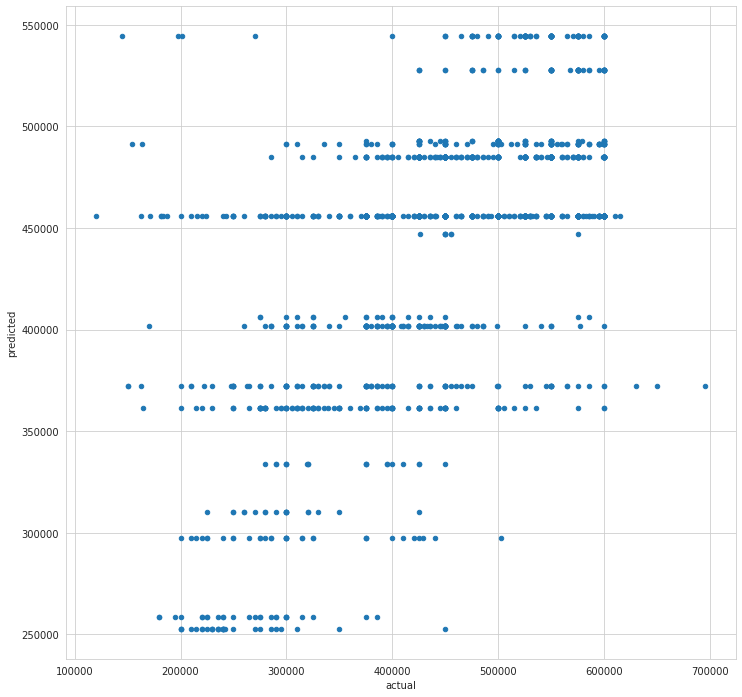

In [19]:
true_vs_pred.plot(kind='scatter',x=0,y=1,figsize=(12,12))